In [ ]:
# Ziel: verallgemeinern 
# - 1 DEM einlesen
# - Snowlayer einlesen mit binär 0=kein schnee, 1= schnee
# - 3 Gletscherumrisse von HEF, Gepatsch, KWF
# - Konturen sollen automatisch berechnet werden
# - Schneelinie pro gletscher pro zeitschritt für den ein Snowlayer eingelesen wurde

In [1]:
import xarray as xr
import rasterio
import numpy as np
import pandas as pd
import os
from rasterio import Affine
from rasterio.enums import Resampling
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Export binärer Raster eines bestimmten Zeitraums unter Addition von Layer 1+2 >0.2

# Definiere den Pfad zur NetCDF-Datei (nc)
input_path = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/results_all_sa/output_grids.nc"
nc = xr.open_dataset(input_path)

# Gletschermaske einlesen (optional, wenn du sie für andere Auswertungen benötigst)
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Gletschermaske als 2D-Array (1 für Gletscher, 0 für keine Bedeckung)

# Definiere den Zeitraum 
june_dates = pd.date_range('2021-05-01', '2021-09-30')

# Definiere den Ordnerpfad, wo die .tif-Dateien gespeichert werden
output_folder = "C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021"  # Bitte den Ordnerpfad nach Bedarf anpassen

# Stelle sicher, dass der Ordner existiert
os.makedirs(output_folder, exist_ok=True)

# Iteriere über alle Tage im Juni 2019
for target_date in june_dates:
    # Wähle die Schneetiefe für die Schneeschichten 1 und 2 für den spezifischen Tag
    snow_layer_1 = nc['snow_thickness_day'].sel(time2=str(target_date), snow_layer=0, method='nearest').values
    snow_layer_2 = nc['snow_thickness_day'].sel(time2=str(target_date), snow_layer=1, method='nearest').values

    # Addiere die Schneeschichten
    total_snow_thickness = snow_layer_1 + snow_layer_2

    # Erstelle die binäre Maske: Wenn der Wert > 0.2, setze ihn auf 1, sonst auf 0
    binary_mask = np.where(total_snow_thickness > 0.2, 1, 0)

    # Definiere den Dateinamen basierend auf dem Datum
    date_str = target_date.strftime('%Y%m%d')
    output_path = os.path.join(output_folder, f"SC_{date_str}.tif")

    # Definiere die Metadaten für das Raster
    # Angenommen, die Koordinaten und die Auflösung des NetCDF-Datasets sind korrekt
    transform = Affine(1, 0, 0, 0, -1, 0)  # Transformation, z.B. von UTM nach Pixelkoordinaten
    metadata = {
        'driver': 'GTiff',
        'count': 1,  # Einzelschicht für binäre Maske
        'dtype': 'uint8',  # Binäre Werte (0 oder 1)
        'crs': 'EPSG:32632',  # EPSG:32632 (UTM Zone 32N)
        'width': binary_mask.shape[1],  # Anzahl der Spalten
        'height': binary_mask.shape[0],  # Anzahl der Zeilen
        'count': 1,  # Eine Schicht
        'nodata': 0,  # Kein Datenwert
        'transform': transform  # Affine Transformation
    }

    # Speichern des binären Rasterbildes als .tif
    with rasterio.open(output_path, 'w', **metadata) as dst:
        dst.write(binary_mask, 1)  # Schreibe die Maske in den ersten (und einzigen) Band

    # Ausgabe der Dateiinformationen
    print(f"Saved binary snow cover raster for {target_date.date()} as {output_path}")


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-05-01 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210501.tif
Saved binary snow cover raster for 2021-05-02 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210502.tif
Saved binary snow cover raster for 2021-05-03 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210503.tif
Saved binary snow cover raster for 2021-05-04 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210504.tif
Saved binary snow cover raster for 2021-05-05 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210505.tif
Saved binary snow cover raster for 2021-05-06 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210506.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-05-07 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210507.tif
Saved binary snow cover raster for 2021-05-08 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210508.tif
Saved binary snow cover raster for 2021-05-09 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210509.tif
Saved binary snow cover raster for 2021-05-10 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210510.tif
Saved binary snow cover raster for 2021-05-11 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210511.tif
Saved binary snow cover raster for 2021-05-12 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210512.tif
Saved binary snow cover raster for 2021-05-13 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210513.tif
Saved binary snow cover raster for 2021-05-14 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210514.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-05-15 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210515.tif
Saved binary snow cover raster for 2021-05-16 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210516.tif
Saved binary snow cover raster for 2021-05-17 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210517.tif
Saved binary snow cover raster for 2021-05-18 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210518.tif
Saved binary snow cover raster for 2021-05-19 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210519.tif
Saved binary snow cover raster for 2021-05-20 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210520.tif
Saved binary snow cover raster for 2021-05-21 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210521.tif
Saved binary snow cover raster for 2021-05-22 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210522.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-05-23 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210523.tif
Saved binary snow cover raster for 2021-05-24 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210524.tif
Saved binary snow cover raster for 2021-05-25 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210525.tif
Saved binary snow cover raster for 2021-05-26 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210526.tif
Saved binary snow cover raster for 2021-05-27 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210527.tif
Saved binary snow cover raster for 2021-05-28 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210528.tif
Saved binary snow cover raster for 2021-05-29 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210529.tif
Saved binary snow cover raster for 2021-05-30 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210530.tif
Saved binary snow cover raster for 2021-05-31 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-06-08 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210608.tif
Saved binary snow cover raster for 2021-06-09 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210609.tif
Saved binary snow cover raster for 2021-06-10 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210610.tif
Saved binary snow cover raster for 2021-06-11 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210611.tif
Saved binary snow cover raster for 2021-06-12 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210612.tif
Saved binary snow cover raster for 2021-06-13 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210613.tif
Saved binary snow cover raster for 2021-06-14 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210614.tif
Saved binary snow cover raster for 2021-06-15 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210615.tif
Saved binary snow cover raster for 2021-06-16 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-06-17 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210617.tif
Saved binary snow cover raster for 2021-06-18 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210618.tif
Saved binary snow cover raster for 2021-06-19 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210619.tif
Saved binary snow cover raster for 2021-06-20 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210620.tif
Saved binary snow cover raster for 2021-06-21 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210621.tif
Saved binary snow cover raster for 2021-06-22 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210622.tif
Saved binary snow cover raster for 2021-06-23 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210623.tif
Saved binary snow cover raster for 2021-06-24 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210624.tif
Saved binary snow cover raster for 2021-06-25 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-06-26 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210626.tif
Saved binary snow cover raster for 2021-06-27 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210627.tif
Saved binary snow cover raster for 2021-06-28 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210628.tif
Saved binary snow cover raster for 2021-06-29 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210629.tif
Saved binary snow cover raster for 2021-06-30 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210630.tif
Saved binary snow cover raster for 2021-07-01 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210701.tif
Saved binary snow cover raster for 2021-07-02 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210702.tif
Saved binary snow cover raster for 2021-07-03 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210703.tif
Saved binary snow cover raster for 2021-07-04 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-05 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210705.tif
Saved binary snow cover raster for 2021-07-06 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210706.tif
Saved binary snow cover raster for 2021-07-07 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210707.tif
Saved binary snow cover raster for 2021-07-08 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210708.tif
Saved binary snow cover raster for 2021-07-09 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210709.tif
Saved binary snow cover raster for 2021-07-10 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210710.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-11 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210711.tif
Saved binary snow cover raster for 2021-07-12 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210712.tif
Saved binary snow cover raster for 2021-07-13 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210713.tif
Saved binary snow cover raster for 2021-07-14 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210714.tif
Saved binary snow cover raster for 2021-07-15 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210715.tif
Saved binary snow cover raster for 2021-07-16 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210716.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-17 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210717.tif
Saved binary snow cover raster for 2021-07-18 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210718.tif
Saved binary snow cover raster for 2021-07-19 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210719.tif
Saved binary snow cover raster for 2021-07-20 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210720.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-21 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210721.tif
Saved binary snow cover raster for 2021-07-22 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210722.tif
Saved binary snow cover raster for 2021-07-23 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210723.tif
Saved binary snow cover raster for 2021-07-24 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210724.tif
Saved binary snow cover raster for 2021-07-25 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210725.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-26 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210726.tif
Saved binary snow cover raster for 2021-07-27 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210727.tif
Saved binary snow cover raster for 2021-07-28 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210728.tif
Saved binary snow cover raster for 2021-07-29 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210729.tif
Saved binary snow cover raster for 2021-07-30 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210730.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-07-31 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210731.tif
Saved binary snow cover raster for 2021-08-01 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210801.tif
Saved binary snow cover raster for 2021-08-02 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210802.tif
Saved binary snow cover raster for 2021-08-03 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210803.tif
Saved binary snow cover raster for 2021-08-04 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210804.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-08-05 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210805.tif
Saved binary snow cover raster for 2021-08-06 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210806.tif
Saved binary snow cover raster for 2021-08-07 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210807.tif
Saved binary snow cover raster for 2021-08-08 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210808.tif
Saved binary snow cover raster for 2021-08-09 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210809.tif
Saved binary snow cover raster for 2021-08-10 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210810.tif
Saved binary snow cover raster for 2021-08-11 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210811.tif
Saved binary snow cover raster for 2021-08-12 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210812.tif
Saved binary snow cover raster for 2021-08-13 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-08-16 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210816.tif
Saved binary snow cover raster for 2021-08-17 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210817.tif
Saved binary snow cover raster for 2021-08-18 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210818.tif
Saved binary snow cover raster for 2021-08-19 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210819.tif
Saved binary snow cover raster for 2021-08-20 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210820.tif
Saved binary snow cover raster for 2021-08-21 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210821.tif
Saved binary snow cover raster for 2021-08-22 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210822.tif
Saved binary snow cover raster for 2021-08-23 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210823.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-08-24 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210824.tif
Saved binary snow cover raster for 2021-08-25 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210825.tif
Saved binary snow cover raster for 2021-08-26 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210826.tif
Saved binary snow cover raster for 2021-08-27 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210827.tif
Saved binary snow cover raster for 2021-08-28 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210828.tif
Saved binary snow cover raster for 2021-08-29 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210829.tif


C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-08-30 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210830.tif
Saved binary snow cover raster for 2021-08-31 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210831.tif
Saved binary snow cover raster for 2021-09-01 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210901.tif
Saved binary snow cover raster for 2021-09-02 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210902.tif
Saved binary snow cover raster for 2021-09-03 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210903.tif
Saved binary snow cover raster for 2021-09-04 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210904.tif
Saved binary snow cover raster for 2021-09-05 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210905.tif
Saved binary snow cover raster for 2021-09-06 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210906.tif
Saved binary snow cover raster for 2021-09-07 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-09-08 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210908.tif
Saved binary snow cover raster for 2021-09-09 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210909.tif
Saved binary snow cover raster for 2021-09-10 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210910.tif
Saved binary snow cover raster for 2021-09-11 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210911.tif
Saved binary snow cover raster for 2021-09-12 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210912.tif
Saved binary snow cover raster for 2021-09-13 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210913.tif
Saved binary snow cover raster for 2021-09-14 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210914.tif
Saved binary snow cover raster for 2021-09-15 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210915.tif
Saved binary snow cover raster for 2021-09-16 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\m

Saved binary snow cover raster for 2021-09-17 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210917.tif
Saved binary snow cover raster for 2021-09-18 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210918.tif
Saved binary snow cover raster for 2021-09-19 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210919.tif
Saved binary snow cover raster for 2021-09-20 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210920.tif
Saved binary snow cover raster for 2021-09-21 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210921.tif
Saved binary snow cover raster for 2021-09-22 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210922.tif
Saved binary snow cover raster for 2021-09-23 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210923.tif
Saved binary snow cover raster for 2021-09-24 as C:/Users/anne_/Desktop/Anne/SC_Rasters2016-21/2021\SC_20210924.tif
Saved binary snow cover raster for 2021-09-25 as C:/Users/anne_/Desktop/

C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\anne_\miniforge3\envs\openamundsen\Lib\site-packages\rasterio\__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [13]:
# Snowline für HEF, HJF, KWF und Gepatsch über glacier selection

# ------------------------------
# 1) Parameter und Pfade anpassen
# ------------------------------
input_folder = r'D:/Anne/SC_Rasters2016-21'  # Ordner mit Schneebedeckungsrastern
dem_file = r'C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/dem_rofental_50.asc'  # Pfad zum DEM
glacier_mask_file = r'C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif'  # Pfad zur „Glacier Selection“-Datei

# IDs deiner Gletscher: 
# (Die Werte sollten exakt mit denen übereinstimmen, die im Raster hinterlegt sind.)
GLACIER_IDS = [755560, 755530, 755531, 755612]

# ------------------------------
# 2) Hilfsfunktionen
# ------------------------------

def calculate_snow_coverage(snow_cover_sub, dem_sub, elevation_bin, bin_width=20):
    """
    Berechnet den prozentualen Anteil an Schnee (==1) in einem bestimmten Höhenintervall.
    snow_cover_sub und dem_sub sind bereits auf einen Gletscherbereich gefiltert (per np.where).
    elevation_bin: unteres Intervall, bin_width: Größe des Intervalls
    """
    bin_mask = (dem_sub >= elevation_bin) & (dem_sub < elevation_bin + bin_width)
    total_pixels = np.sum(bin_mask)
    if total_pixels == 0:
        return 0.0
    # Da die Arrays NaN für alle Nicht-Gletscher-Pixel haben, filtern wir diese aus:
    snow_pixels = np.sum((snow_cover_sub[bin_mask] == 1) & ~np.isnan(snow_cover_sub[bin_mask]))
    return (snow_pixels / total_pixels) * 100.0


def find_snowline(dem_sub, snow_cover_sub, bin_width=20):
    """
    Bestimmt die Snow Line (SLA) in einem bereits auf einen Gletscher-Subset gefilterten
    dem_sub und snow_cover_sub. Gibt einen Höhenbereich (tuples) zurück.
    
    Suchlogik:
    - Zuerst wird nach 5 aufeinander folgenden Bins >50% geschaut,
    - sonst 4 Bins,
    - sonst 3 Bins,
    - sonst 1 Bin.
    """
    # min-/max-Höhe nur über den Gletscherbereich bestimmen
    min_elevation = np.nanmin(dem_sub)
    max_elevation = np.nanmax(dem_sub)

    # Falls das Gletscher-Areal leer oder nur NaNs ist:
    if np.isnan(min_elevation) or np.isnan(max_elevation):
        return None
    
    # Iteration in Schritten von bin_width (z. B. 20 m)
    for elevation_bin in range(int(min_elevation), int(max_elevation)+1, bin_width):
        # Berechne Schneebedeckung für die nächsten 5 Bins
        snow_coverage = []
        for i in range(5):
            current_bin = elevation_bin + i * bin_width
            if current_bin < max_elevation:
                coverage = calculate_snow_coverage(snow_cover_sub, dem_sub, current_bin, bin_width)
                snow_coverage.append(coverage)
            else:
                break

        # 5 Bins > 50%
        if len(snow_coverage) >= 5 and all(sc > 50 for sc in snow_coverage[:5]):
            return (elevation_bin, elevation_bin + 4 * bin_width)
        # 4 Bins > 50%
        elif len(snow_coverage) >= 4 and all(sc > 50 for sc in snow_coverage[:4]):
            return (elevation_bin, elevation_bin + 3 * bin_width)
        # 3 Bins > 50%
        elif len(snow_coverage) >= 3 and all(sc > 50 for sc in snow_coverage[:3]):
            return (elevation_bin, elevation_bin + 2 * bin_width)
    
    # Keine 3-5 aufeinanderfolgenden Bins gefunden -> Schau nach einzelnen Bins > 50%
    for elevation_bin in range(int(min_elevation), int(max_elevation)+1, bin_width):
        coverage = calculate_snow_coverage(snow_cover_sub, dem_sub, elevation_bin, bin_width)
        if coverage > 50:
            return (elevation_bin, elevation_bin)
    
    # Gar nicht gefunden
    return None

# ------------------------------
# 3) Hauptfunktion
# ------------------------------

def process_snow_cover_files_multiple_glaciers(input_folder, dem_file, glacier_mask_file, glacier_ids):
    """
    Liest das DEM, die „Glacier Selection“-Datei und alle Schneebedeckungs-Raster ein.
    Für jeden Zeitschritt (Snow-Cover-Datei) und jeden Gletscher (ID) wird die Snow Line bestimmt.
    Ergebnisse werden in separaten CSV-Dateien pro Gletscher-ID gespeichert.
    """
    # 1) DEM einlesen
    with rasterio.open(dem_file) as dem_src:
        dem_array = dem_src.read(1)
    
    # 2) Glacier-Mask einlesen
    with rasterio.open(glacier_mask_file) as glacier_src:
        glacier_mask_array = glacier_src.read(1)

    # 3) Liste aller Schneebedeckungsdateien
    snow_cover_files = [f for f in os.listdir(input_folder) 
                        if f.endswith('.tif') and f.startswith('SC_')]

    # Erstelle ein Dictionary, in dem pro Gletscher-ID eine leere Liste steht,
    # um die Ergebnisse zu sammeln
    results_by_glacier = {gid: [] for gid in glacier_ids}

    # 4) Iteration über jede Schneebedeckungsdatei
    for snow_cover_file in snow_cover_files:
        file_path = os.path.join(input_folder, snow_cover_file)
        print(f"Processing {snow_cover_file}...")
        
        # Extrahiere das Datum aus dem Dateinamen (Format: SC_YYYYMMDDHEF.tif)
        date_str = snow_cover_file[3:11]  # z. B. '20210715'
        
        # 4a) Snow Cover Array einlesen
        with rasterio.open(file_path) as sc_src:
            snow_cover_array = sc_src.read(1)

        # 4b) Für jede Gletscher-ID Snow Line berechnen
        for gid in glacier_ids:
            # Erzeuge eine Maske nur für diesen Gletscher
            glacier_mask = (glacier_mask_array == gid)
            
            # Filtere DEM und Snow-Cover-Array auf diesen Gletscher:
            # überall sonst np.nan
            dem_sub = np.where(glacier_mask, dem_array, np.nan)
            snow_sub = np.where(glacier_mask, snow_cover_array, np.nan)
            
            # Snowline bestimmen
            sla_range = find_snowline(dem_sub, snow_sub, bin_width=20)
            
            if sla_range:
                # z. B. (2800, 2880)
                sla_str = f"{sla_range[0]} - {sla_range[1]}"
            else:
                sla_str = "No SLA found"
            
            # Ergebnis merken
            results_by_glacier[gid].append({
                "Date": date_str,
                "SnowCoverFile": snow_cover_file,
                "SLA Range (m)": sla_str
            })
    
    # 5) Ergebnisse in separaten CSVs pro Glacier-ID speichern
    for gid, results_list in results_by_glacier.items():
        df = pd.DataFrame(results_list)
        out_csv = os.path.join(input_folder, f"snowline_results_{gid}.csv")
        df.to_csv(out_csv, index=False)
        print(f"Ergebnisse für Gletscher {gid} gespeichert in: {out_csv}")

# ------------------------------
# 4) Skript ausführen
# ------------------------------
if __name__ == "__main__":
    process_snow_cover_files_multiple_glaciers(
        input_folder=input_folder,
        dem_file=dem_file,
        glacier_mask_file=glacier_mask_file,
        glacier_ids=GLACIER_IDS
    )


Processing SC_20160301.tif...
Processing SC_20160302.tif...
Processing SC_20160303.tif...
Processing SC_20160304.tif...
Processing SC_20160305.tif...
Processing SC_20160306.tif...
Processing SC_20160307.tif...
Processing SC_20160308.tif...
Processing SC_20160309.tif...
Processing SC_20160310.tif...
Processing SC_20160311.tif...
Processing SC_20160312.tif...
Processing SC_20160313.tif...
Processing SC_20160314.tif...
Processing SC_20160315.tif...
Processing SC_20160316.tif...
Processing SC_20160317.tif...
Processing SC_20160318.tif...
Processing SC_20160319.tif...
Processing SC_20160320.tif...
Processing SC_20160321.tif...
Processing SC_20160322.tif...
Processing SC_20160323.tif...
Processing SC_20160324.tif...
Processing SC_20160325.tif...
Processing SC_20160326.tif...
Processing SC_20160327.tif...
Processing SC_20160328.tif...
Processing SC_20160329.tif...
Processing SC_20160330.tif...
Processing SC_20160331.tif...
Processing SC_20160401.tif...
Processing SC_20160402.tif...
Processing

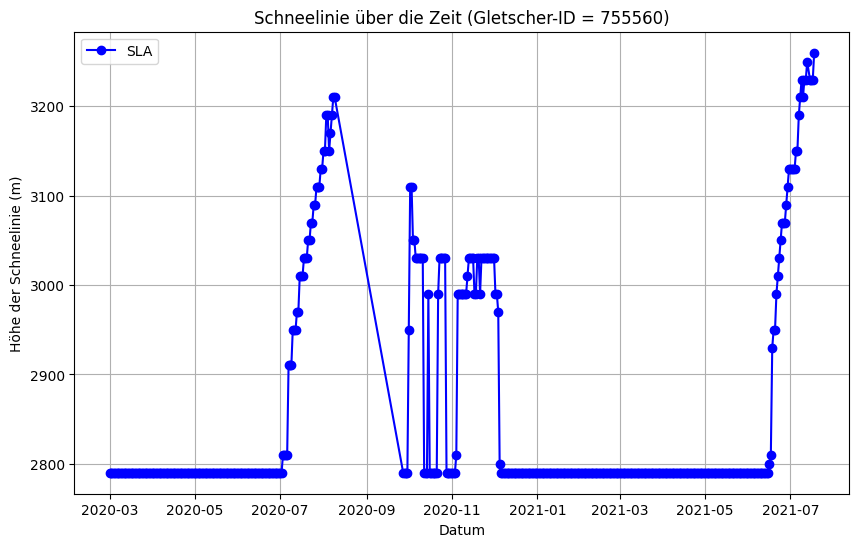

In [6]:
# Abbildung pro Gletscher

# 1) CSV einlesen (Dateiname anpassen)
df = pd.read_csv("C:/Users/anne_/Desktop/Anne/SC_Rasters2020-21/snowline_results_755560.csv")

#2) Zeilen mit "No SLA found" aussortieren
df = df[df["SLA Range (m)"] != "No SLA found"]

# 3) SLA-Min und -Max aus dem String extrahieren
df["SLA_min"] = df["SLA Range (m)"].str.split(" - ").str[0].astype(float)
df["SLA_max"] = df["SLA Range (m)"].str.split(" - ").str[1].astype(float)

# 4) Mittlere SLA-Höhe berechnen
df["SLA_mid"] = (df["SLA_min"] + df["SLA_max"]) / 2

# 5) Datum in ein DateTime-Format bringen
#    Falls dein Datumsstring ein anderes Format hat, hier anpassen (z. B. "%Y%m%d" oder "%d.%m.%Y" etc.)
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

# 6) Nach Datum sortieren
df.sort_values(by="Date", inplace=True)

# 7) Liniendiagramm plotten
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["SLA_mid"], marker="o", linestyle="-", color="b", label="SLA")
plt.xlabel("Datum")
plt.ylabel("Höhe der Schneelinie (m)")
plt.title("Schneelinie über die Zeit (Gletscher-ID = 755560)")
plt.grid(True)
plt.legend()
plt.show()


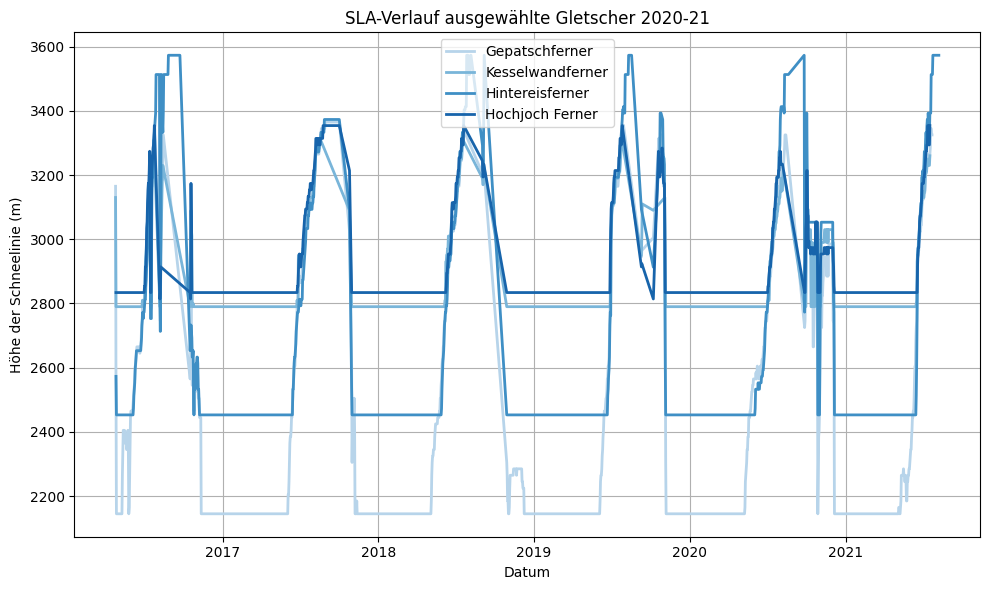

In [2]:
#Plot für SLA aller Gletscher in einem 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# -------------------------------
# 1) Parameter: Pfade & Gletscher-IDs
# -------------------------------
input_folder = r"D:/Anne/SC_Rasters2016-21"  # Ordner mit CSVs
output_path = r"C:/Users/anne_/Desktop/Anne/SLA_2016-21.png"      # Speicherpfad für die Grafik

# Gletscher-IDs und zugehörige Namen:
gid_to_name = {
    755530: "Gepatschferner",
    755560: "Kesselwandferner",
    755531: "Hintereisferner",
    755612: "Hochjoch Ferner"
}
gids = list(gid_to_name.keys())

# -------------------------------
# 2) Farben definieren
# -------------------------------
num_glaciers = len(gids)
blues = cm.Blues(np.linspace(0.3, 0.8, num_glaciers))  # 4 Blautöne von hell bis dunkel

# -------------------------------
# 3) Plot erstellen
# -------------------------------
plt.figure(figsize=(10, 6))

for i, gid in enumerate(gids):
    csv_file = os.path.join(input_folder, f"snowline_results_{gid}.csv")

    # CSV einlesen
    df = pd.read_csv(csv_file)

    # Zeilen mit "No SLA found" ausschließen
    df = df[df["SLA Range (m)"] != "No SLA found"]
    if df.empty:
        print(f"Keine gültigen SLA-Daten für Gletscher {gid} in '{csv_file}'.")
        continue

    # SLA-Min / -Max extrahieren
    df["SLA_min"] = df["SLA Range (m)"].str.split(" - ").str[0].astype(float)
    df["SLA_max"] = df["SLA Range (m)"].str.split(" - ").str[1].astype(float)
    df["SLA_mid"] = (df["SLA_min"] + df["SLA_max"]) / 2

    # Datum parsen (Format: YYYYMMDD)
    df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

    # Sortierung nach Datum
    df.sort_values(by="Date", inplace=True)

    # Plot: Linien ohne Marker, Farbe aus 'blues'
    plt.plot(
        df["Date"], 
        df["SLA_mid"],
        color=blues[i],
        linestyle="-",
        linewidth=2,
        marker=None,
        label=gid_to_name[gid]  # <-- Statt Gletscher-ID jetzt den Namen anzeigen
    )

# -------------------------------
# 4) Diagramm-Details & Speichern
# -------------------------------
plt.xlabel("Datum")
plt.ylabel("Höhe der Schneelinie (m)")
plt.title("SLA-Verlauf ausgewählte Gletscher 2020-21")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Grafik speichern (z. B. als PNG in hoher Auflösung)
plt.savefig(output_path, dpi=300)

# Optional: Plot anzeigen
plt.show()


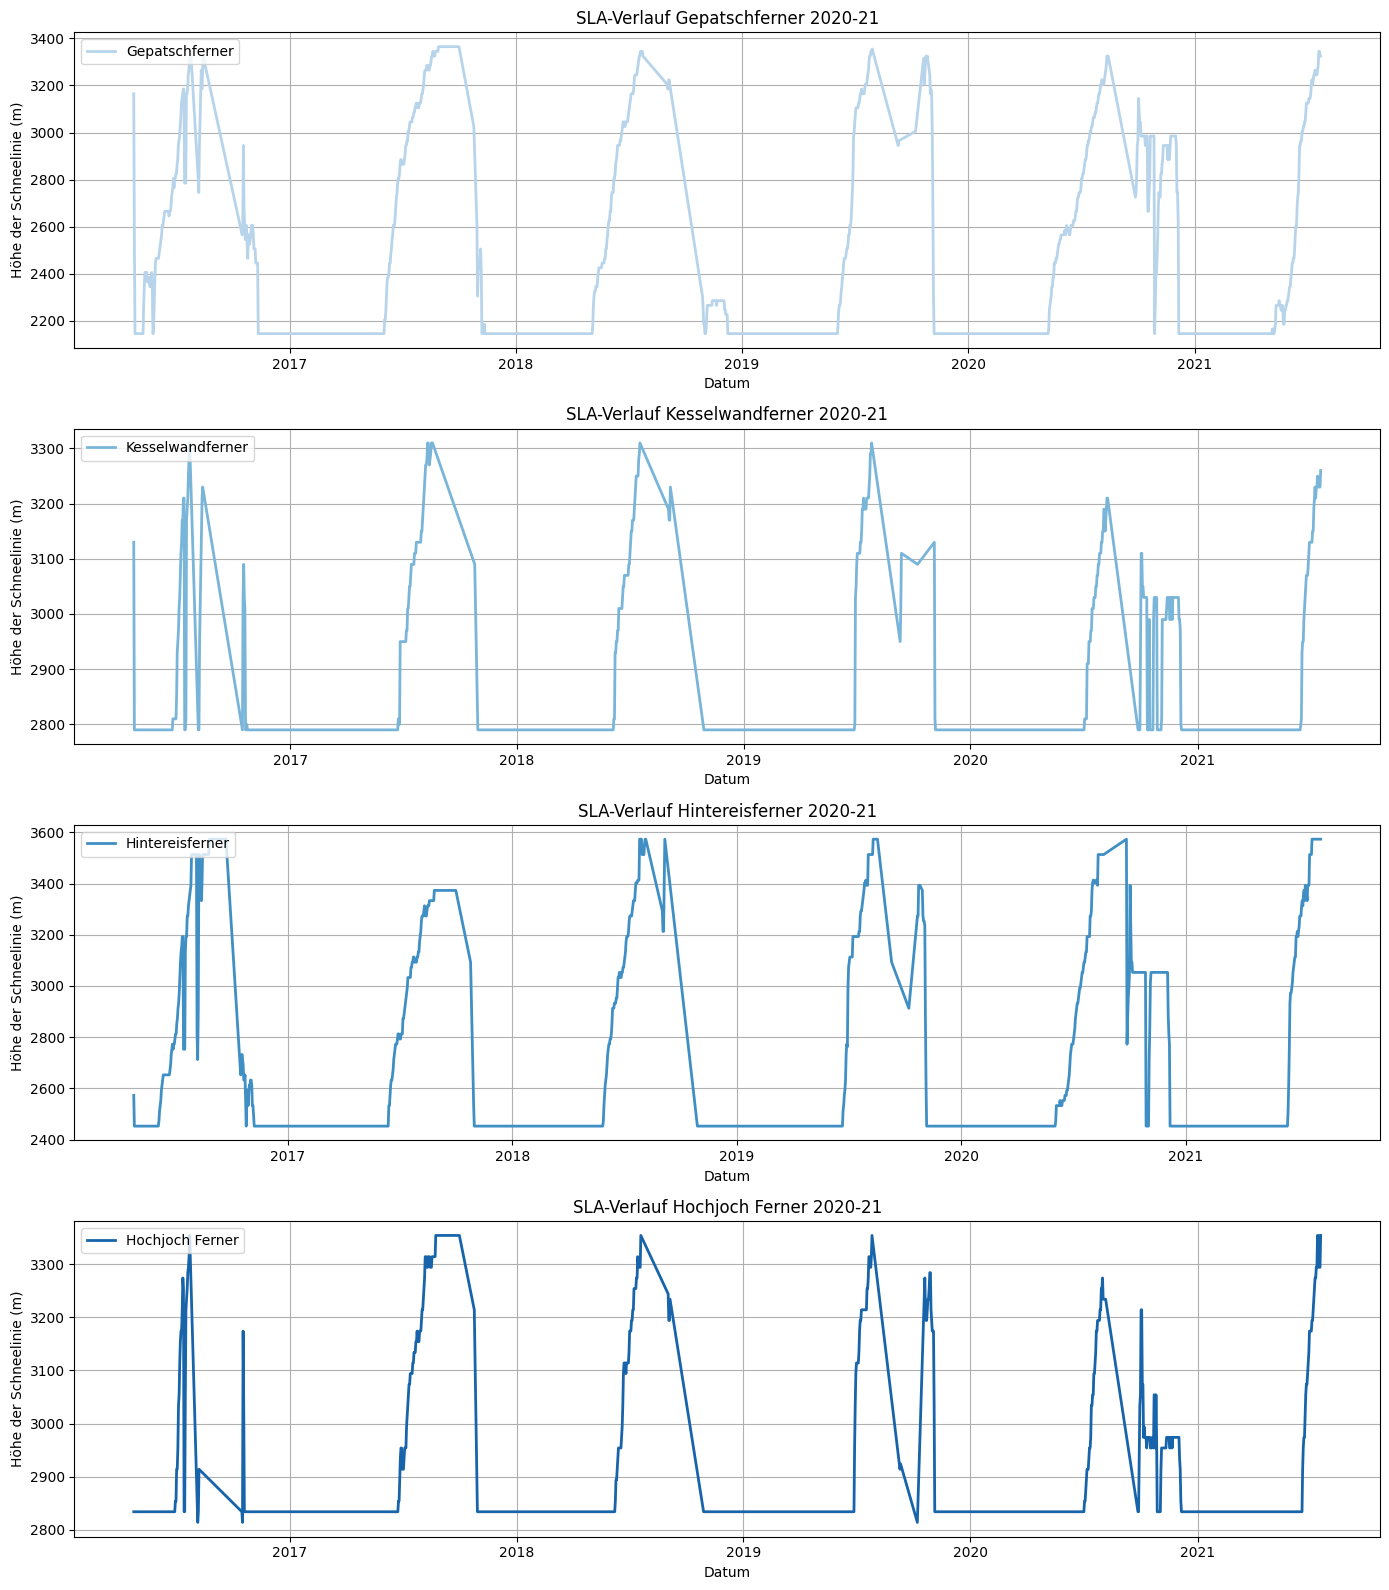

In [4]:
# Plot für 4 geteilte Grafik mit SLA über Zeit pro Gletscher 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# -------------------------------
# 1) Parameter: Pfade & Gletscher-IDs
# -------------------------------
input_folder = r"D:/Anne/SC_Rasters2016-21"  # Ordner mit CSVs
output_path = r"C:/Users/anne_/Desktop/Anne/split_SLA_2016-21.png"      # Speicherpfad für die Grafik

# Gletscher-IDs und zugehörige Namen:
gid_to_name = {
    755530: "Gepatschferner",
    755560: "Kesselwandferner",
    755531: "Hintereisferner",
    755612: "Hochjoch Ferner"
}
gids = list(gid_to_name.keys())

# -------------------------------
# 2) Farben definieren
# -------------------------------
num_glaciers = len(gids)
blues = cm.Blues(np.linspace(0.3, 0.8, num_glaciers))  # 4 Blautöne von hell bis dunkel

# -------------------------------
# 3) Subplots erstellen
# -------------------------------
# 4 Subplots untereinander, aber breiter (für mehr Übersichtlichkeit)
fig, axs = plt.subplots(num_glaciers, 1, figsize=(14, 4 * num_glaciers))  # Breite angepasst, Höhe reduziert

# Wenn nur ein Gletscher vorhanden ist, wird axs zu einem einzelnen Ax-Objekt, daher müssen wir es in eine Liste umwandeln.
if num_glaciers == 1:
    axs = [axs]

# Iteriere über alle Gletscher
for i, gid in enumerate(gids):
    csv_file = os.path.join(input_folder, f"snowline_results_{gid}.csv")

    # CSV einlesen
    df = pd.read_csv(csv_file)

    # Zeilen mit "No SLA found" ausschließen
    df = df[df["SLA Range (m)"] != "No SLA found"]
    if df.empty:
        print(f"Keine gültigen SLA-Daten für Gletscher {gid} in '{csv_file}'.")
        continue

    # SLA-Min / -Max extrahieren
    df["SLA_min"] = df["SLA Range (m)"].str.split(" - ").str[0].astype(float)
    df["SLA_max"] = df["SLA Range (m)"].str.split(" - ").str[1].astype(float)
    df["SLA_mid"] = (df["SLA_min"] + df["SLA_max"]) / 2

    # Datum parsen (Format: YYYYMMDD)
    df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

    # Sortierung nach Datum
    df.sort_values(by="Date", inplace=True)

    # Plotten auf dem jeweiligen Subplot (axs[i])
    axs[i].plot(
        df["Date"], 
        df["SLA_mid"],
        color=blues[i],
        linestyle="-",
        linewidth=2,
        marker=None,
        label=gid_to_name[gid]  # Statt Gletscher-ID den Namen anzeigen
    )

    # Details für jedes Subplot
    axs[i].set_xlabel("Datum")
    axs[i].set_ylabel("Höhe der Schneelinie (m)")
    axs[i].set_title(f"SLA-Verlauf {gid_to_name[gid]} 2020-21")
    axs[i].grid(True)
    
    # Position der Legende anpassen (links oben)
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)

# -------------------------------
# 4) Diagramm anpassen & Speichern
# -------------------------------
plt.tight_layout()  # Verhindert, dass die Subplots überlappen

# Grafik speichern (z. B. als PNG in hoher Auflösung)
plt.savefig(output_path, dpi=300)

# Optional: Plot anzeigen
plt.show()



SLA-Werte für 20190605:
Gepatschferner: None m
Kesselwandferner: None m
Hintereisferner: None m
Hochjoch Ferner: None m


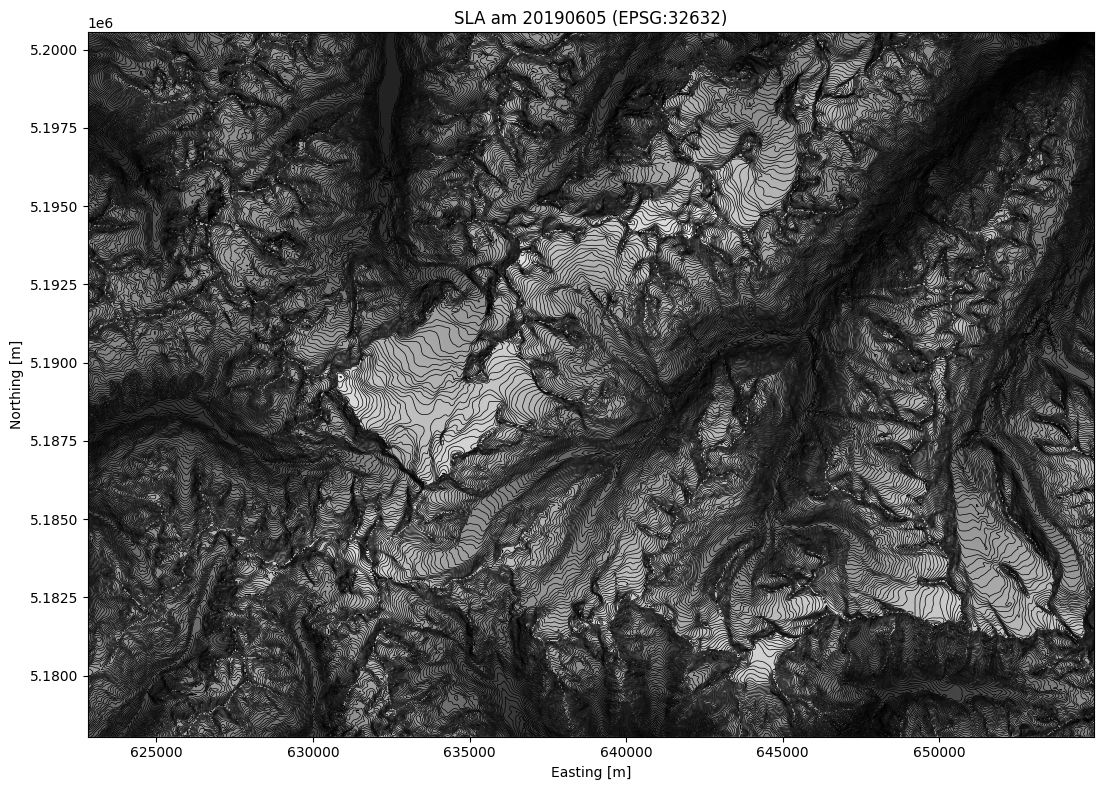

In [27]:
# Versuch die SLA zu visualisieren
import os
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# input_folder = r'C:/Users/anne_/Desktop/Anne/SC_Rasters'  # Ordner mit Schneebedeckungsrastern
# dem_file = r'C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/dem_rofental_50.asc'  # Pfad zum DEM
# glacier_mask_file = r'C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif'  # Pfad zur „Glacier Selection“-Datei


# -------------------------------
# 1) Pfade und Gletscherinformationen
# -------------------------------
dem_path = r"C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/dem_rofental_50.asc"   # Pfad zu deinem DEM
input_folder = r"C:/Users/anne_/Desktop/Anne/SC_Rasters"    # Ordner mit CSV-Dateien
output_path = r"C:/Users/anne_/Desktop/Anne/SC_Rasters/sla_plot.png"  # Speicherpfad der Karte

gid_csv_map = {
    755530: "snowline_results_755530.csv",  # Gepatschferner
    755560: "snowline_results_755560.csv",  # Kesselwandferner
    755531:  "snowline_results_755531.csv",   # Hintereisferner
    755612: "snowline_results_755612.csv"   # Hochjoch Ferner
}

gid_name_map = {
    755530: "Gepatschferner",
    755560: "Kesselwandferner",
    755531:  "Hintereisferner",
    755612: "Hochjoch Ferner"
}

# Ziel-Datum
target_date = "20190605"

# -------------------------------
# 2) SLA aus CSV-Dateien laden
# -------------------------------
def get_mid_sla_for_date(csv_file, date_str):
    """Liest die SLA-Werte für ein bestimmtes Datum aus einer CSV-Datei."""
    df = pd.read_csv(csv_file)

    # Filter für das gewünschte Datum
    df = df[df["Date"] == date_str]
    if df.empty:
        return None

    # "No SLA found" behandeln
    sla_str = df["SLA Range (m)"].values[0]
    if sla_str == "No SLA found":
        return None

    # Min- und Max-Werte extrahieren
    parts = sla_str.split(" - ")
    sla_min = float(parts[0])
    sla_max = float(parts[1])
    return (sla_min + sla_max) / 2  # Mittelwert berechnen

sla_values = {}
for gid, csv_name in gid_csv_map.items():
    csv_path = os.path.join(input_folder, csv_name)
    sla_mid = get_mid_sla_for_date(csv_path, target_date)
    sla_values[gid] = sla_mid

# Debug-Ausgabe: SLA-Werte prüfen
print(f"SLA-Werte für {target_date}:")
for gid, sla_mid in sla_values.items():
    print(f"{gid_name_map[gid]}: {sla_mid} m")

# -------------------------------
# 3) DEM einlesen
# -------------------------------
with rasterio.open(dem_path) as dem_src:
    dem_array = dem_src.read(1)
    transform = dem_src.transform
    crs = dem_src.crs
    width = dem_src.width
    height = dem_src.height

x_coords = np.arange(width) * transform[0] + transform[2]
y_coords = np.arange(height) * transform[4] + transform[5]
X, Y = np.meshgrid(x_coords, y_coords)

# -------------------------------
# 4) Karte erstellen
# -------------------------------
plt.figure(figsize=(12, 8))

# 4a) DEM anzeigen
plt.imshow(
    dem_array,
    extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()],
    cmap="gray",
    origin="upper"
)

# 4b) Höhenlinien (20 m Abstand)
contour_interval = 20
dem_min = np.nanmin(dem_array)
dem_max = np.nanmax(dem_array)
levels = np.arange(dem_min - (dem_min % contour_interval), 
                   dem_max + contour_interval, 
                   contour_interval)

cs = plt.contour(X, Y, dem_array, levels=levels, colors="black", linewidths=0.5)

# 4c) SLA als rote Konturlinie
for gid, sla_mid in sla_values.items():
    if sla_mid is not None and dem_min <= sla_mid <= dem_max:
        plt.contour(X, Y, dem_array, levels=[sla_mid], colors="red", linewidths=2)
        # Beschriftung der Gletscher
        plt.text(
            x_coords.mean(), 
            y_coords.mean(), 
            f"{gid_name_map[gid]} SLA: {sla_mid:.1f} m", 
            color="red", fontsize=10, bbox=dict(facecolor="white", alpha=0.7, edgecolor="red")
        )

# -------------------------------
# 5) Layout und speichern
# -------------------------------
plt.title(f"SLA am {target_date} (EPSG:32632)")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()

# Plot speichern
plt.savefig(output_path, dpi=300)
plt.show()